In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
dataset = pd.read_csv("dataset_new.csv")
dataset.drop(["Unnamed: 0"], axis = 1, inplace=True)
dataset.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita
0,Afghanistan,2003,14.738506,9.50,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814
1,Afghanistan,2004,20.064968,10.90,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074
2,Afghanistan,2005,25.390894,12.20,7.51,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313
3,Afghanistan,2006,30.718690,13.85,7.40,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602
4,Afghanistan,2007,36.051010,15.30,7.25,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158


In [42]:
def conversion(colName, newColName):
    dataset[newColName] = np.nan
    mean_col = dataset.groupby('Year')[colName].mean()
    dataset[newColName] = dataset.apply(lambda row: row[colName] > mean_col[row['Year']], axis=1)
    dataset.drop([colName], axis = 1, inplace = True)

colName = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)', 
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country', 
    'gdp_per_capita',
    'gdp_growth']
    
newColName = [
    'Access to electricity above avg',
    'Access to clean fuels for cooking above avg',
    'Renewable electricity generating capacity per capita above avg',
    'Renewable energy share in the total final energy consumption above avg',
    'Electricity from fossil fuels above avg', 
    'Electricity from nuclear above avg',
    'Electricity from renewables above avg',
    'Low-carbon electricity above avg',
    'Primary energy consumption per capita above avg',
    'Energy intensity level of primary energy above avg',
    'Value_co2_emissions_kt_by_country_above_avg', 
    'gdp_per_capita_above_avg',
    'gdp_growth_above_avg']


In [43]:
for i in range(len(colName)):
    conversion(colName[i], newColName[i])

dataset.drop(['Entity', 'Year'], axis = 1, inplace=True)
dataset.head()

,Access to electricity above avg,Access to clean fuels for cooking above avg,Renewable electricity generating capacity per capita above avg,Renewable energy share in the total final energy consumption above avg,Electricity from fossil fuels above avg,Electricity from nuclear above avg,Electricity from renewables above avg,Low-carbon electricity above avg,Primary energy consumption per capita above avg,Energy intensity level of primary energy above avg,Value_co2_emissions_kt_by_country_above_avg,gdp_per_capita_above_avg,gdp_growth_above_avg
0,False,False,False,True,False,False,False,True,False,False,False,False,True
1,False,False,False,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,True


In [44]:
x = dataset.drop(['gdp_growth_above_avg'], axis = 1)
y = dataset['gdp_growth_above_avg']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [45]:
model = LogisticRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print(metrics.accuracy_score(prediction, y_test))
print(metrics.f1_score(prediction, y_test))

0.6147623862487361
0.6238894373149062


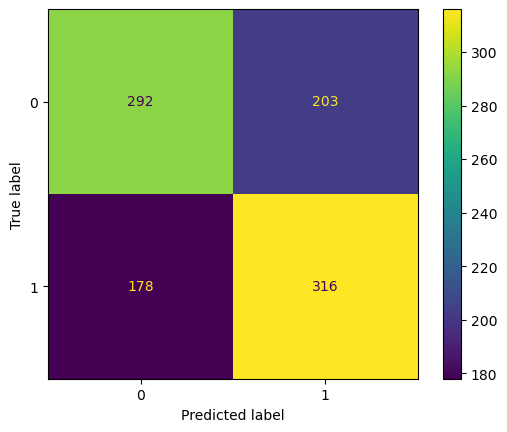

In [46]:
confusionMatrix = metrics.confusion_matrix(y_test, prediction)

figure = metrics.ConfusionMatrixDisplay(confusionMatrix)
figure.plot()